In [1]:
import handcalcs.render

from math import pi
from math import sqrt
from pint import UnitRegistry
u = UnitRegistry(auto_reduce_dimensions=True)

# Pump Design Report

### Dan McSweeney, Alexander Voss, Michael Mattaliano

### December 5th, 2023

#### Abstract:
Our chosen pipe diameter is $D_{proto} = 22.33 in$, and the pump impeller size is $D_{impeller} = 9.787 in$, running at a speed of $\Omega_{proto} = 1350\frac{rev}{min}$. This will allow us to have a flow rate of $Q_{min} = 3125\frac{gallon}{min}$, which will satisy the design requirements.

This is all done with a piping system consisting of galvanized iron, coefficient of friction , and a kinematic viscosity of water at $T = 10^{\circ}C$ of $\mu = 1.3*\frac{mm^2}{s}$. Finally, the loss coefficients for elbows and valves are $K_{L,elbow} = 0.4$, and $K_{L,valve} = 0.3$, respectively.

### 1 Introduction
Our project goal was to select an appropriate water pump and piping system to be able to supply a water tank with 1.5 million gallons of water, and have it filled in no more than 8 hours. Our water pump is 0.8 miles away, and 150 feet below the water tank, and we need to include 10 elbows/bends, and 4 butterfly valves, all within galvanized iron. Therefore, our variables to determine include pipe diameter, impeller size, and impeller speed. All of these variables have an associated cost, so we need to determine and effective an economical outcome.

### 2 Methods
Overall, our approach was to use dimentional analysis and scaling to meet design parameters. Starting with flow rate, we could find the necessary flow rate to flow 1.5 million gallons of water in 8 hours. Then, we would start using dimensional analysis.

#### 2.1 Pipe Size Design 
To start finding our prototypes dimensions, we would find a dimensionless value for our model using the given dimensionless equations, and then find a corresponding dimensionless value for the prototype. This would show the relationship for how large our prototype should be compared to the model. Also, we would have to make sure the the pipe size, impeller speed, and the given $Q$ and $h$ from the model equate to appropriate dimentional similarity for power, pressure, and flow rate. Once we found these values for the prototype, we can apply the head loss to the energy equation, including head loss of pump, major, and minor to include the losses due to our material, valves, and elbows. Lastly, we can then solve for the necessary power, including the efficiency of the pump, to solve for the power needed.

#### 2.2 Pump Impeller Speed Design
We made an educated assumption for our impeller speed. We assumed a roational speed of $\Omega_{proto} = 1350\frac{rev}{min}$. This was done so our pump was never overworked, but had a margin of compliance to increase or decrease pump speed, if needed. This would be especially useful in real world scenario.

#### 2.3 Impeller Size Design
To find our necessary impeller size, we first found the pipe size in our system, and made the assumption for impeller speed. This allowed us to use the equation $D_{impeller} = \sqrt{\frac{4 * Q}{\Omega * D}}$, thus solving for the associated impeller size.

#### 2.4 Assumptions
$\bf{\circ}$The life expectancy of our ideal water pump is a reasonable 8 years. After googling the Taco Inc. model 1260 pump, we found its life expectancy to be a minimum of 60,000 hours, or just under 7 years. Further research for industrial pumps showed 8-10 years, based on water quality and usage. Based on this information, we assumed an 8 year pump-life. $$ $$ 

$\bf{\circ}$We assume the pressure at the aquifer and the water tank are equal, both at atmospheric pressure. $$ $$ 

$\bf{\circ}$Assuming the water as an incompressible fluid, and the diameter of our pipe to be constant throughout, the velocity of the fluid entering and exiting the piping system will be equal. This can be seen with the equation $\rho_1 A_1 V_1 = \rho_2 A_2 V_2$ $$ $$

$\bf{\circ}$ Assume the model and the protptype are dynamically similar. $$ $$

$\bf{\circ}$ We assumed an ideal impeller speed of $\Omega_{proto} = 1350\frac{rev}{min}$ as it was in the middle of our given range. We knew this would give our system flexibility to be run faster or slower if design parameters varied, as they most likely would in a real world application. The water usage could vary by season, days of the week, or just overall increase as population increases. This will also maximize longevity, as it is not running at a near max $\frac{rev}{min}$. $$ $$

$\bf{\circ}$ We assumed a constant value for $K_{L,elbow}$ and $K_{L,valve}$. The values we used were for a 45$^\circ$ bend, and a partially closed butterfly valve, and this was done so we coud make the assumption that over 10 elbows with various angles, and 4 butterfly valves with various openings, the average bend/opening would most likely equate to our chosen $K_L$ values.

### 3 Results:
Our results were found by relating the test values from the model in a dimensionless form to our ideal prototype dimensions using a "plug and chug" approach. After testing, we found dimensionless values within a $1$% margin of error from model to prototype.

#### 3.1 Properties

In [2]:
V_tank = 1*10**6*u.gal
T_aquifer = 283*u.K
d_aquifer = 0.8*u.miles
h_aquifer = 150*u.ft
V_use = 1.5*10**6*u.gal
t_fill = 8*u.hours
friction_giron = 0.15

D_model = 0.4541667*u.ft
ohm_model = 1760*u.radian/u.min
T_model = 293*u.K
A = D_model**2 * pi * .25

Q_min = V_use / t_fill
pumplife = 8*u.years

Q_test = 60*u.gal/(u.min)
H_test = 15*u.ft
V_test = A / Q_test
eff = 0.45

rho = 64.4062*u.lb/(u.ft*u.ft*u.ft)
g = 115866.142*u.ft/(u.s*u.s)

In [3]:
print(f'The necessary flow rate is {Q_min.to(u.gal/u.min)} to meet design parameters.')

The necessary flow rate is 3125.0 gallon / minute to meet design parameters.


#### 3.2 Pipe Size / Pump Impeller Speed

In [4]:
%%render short
Power_test = rho * Q_test * g * H_test
Power_0 = Power_test / rho / ohm_model**3 / D_model**5

ohm_proto = 1350*u.radian/u.min
D_proto = 22.33*u.inch

Power_testP = rho * Q_min * g * h_aquifer
Power_0P = Power_testP / rho / ohm_proto**3 / D_proto**5

<IPython.core.display.Latex object>

In [5]:
%%render short
Head_test = g * H_test
Pressure_0 = Head_test / ohm_model**2 / D_model**2

Head_testP = g * h_aquifer
Head_0P = Head_testP / ohm_proto**2 / D_proto**2

<IPython.core.display.Latex object>

In [6]:
%%render short
FlowRate_0 = Q_test / ohm_model / D_model**3

FlowRate_0P = Q_min / ohm_proto / D_proto**3

<IPython.core.display.Latex object>

##### Therefore,
 Using the given values $Q = 60\frac{gal}{min}$ and $h = 15ft$ from the model, we found all 3 our our dimensionless equations to have similarity from model to prototype within a $1$% margin. Our pipe size and impeller speed were found to be

In [7]:
print(f'The chosen pipe diameter is {D_proto} to meet design parameters.')
print(f'The chosen impeller speed has the reveloutions of {ohm_proto} to meet design parameters.')

The chosen pipe diameter is 22.33 inch to meet design parameters.
The chosen impeller speed has the reveloutions of 1350.0 / minute to meet design parameters.


#### 3.3 Power Results
For power, we knew the necessary power to run our pump was $Power = \Delta P * \dot Q$, where $\Delta P$ is seen as $P = \rho g h_{aquifer}$. This is due to our assumption that the pressure in the aquifer was atmospheric, so we saw $P_{aquifer} = 0$, and the pressure after the pump was the density of the water, multiplied by the gravity constant, multiplied by the change in height between the tank and aquifer. Lastly, we applied that our efficiency of our pump was only 45%, found in the problem corresponding to our $Q_{model}$ and $H_{model}$ values.

In [8]:
%%render short
P_change = rho * g * h_aquifer
Power_theoretical = Q_min * P_change
Power_actual = Power_theoretical / eff

<IPython.core.display.Latex object>

In [9]:
print(f'The necessary flow rate is {Power_actual.to(u.kW)} to meet design parameters.')

The necessary flow rate is 729836.6140258596 kilowatt to meet design parameters.


#### 3.4 Pump Impeller Size Results

In [10]:
%%render short
D_impeller = (4 * Q_min / ohm_proto / D_proto)**0.5

<IPython.core.display.Latex object>

In [11]:
print(f'The equated impeller diamter is {D_impeller} to meet design parameters.')

The equated impeller diamter is 9.787003658578392 inch to meet design parameters.


#### 3.5 Graphs/Schematics

In [12]:
from matplotlib import pyplot as plt
import numpy as np

In [13]:
Q = np.array([0, 5, 15, 20, 25, 30, 35, 40, 45, 45, 50, 55, 60])*u.gallons/u.min
H = np.array([28, 28, 29, 29, 28, 28, 27, 26, 25, 23, 21, 18, 15])*u.ft
Efficiency = np.array([0, 13, 25, 35, 44, 48, 51, 53, 54, 55, 53, 50, 45])

/home/jifutan/miniconda3/envs/edu/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


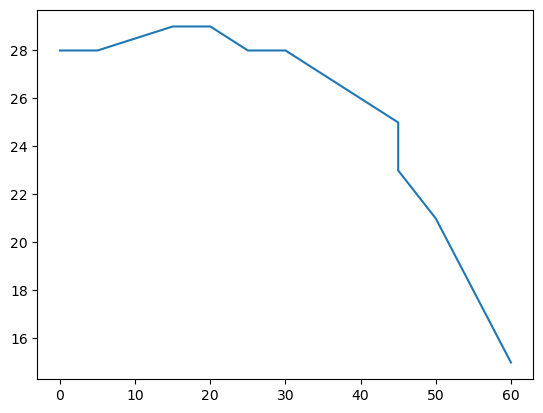

In [14]:
plt.plot(Q, H)

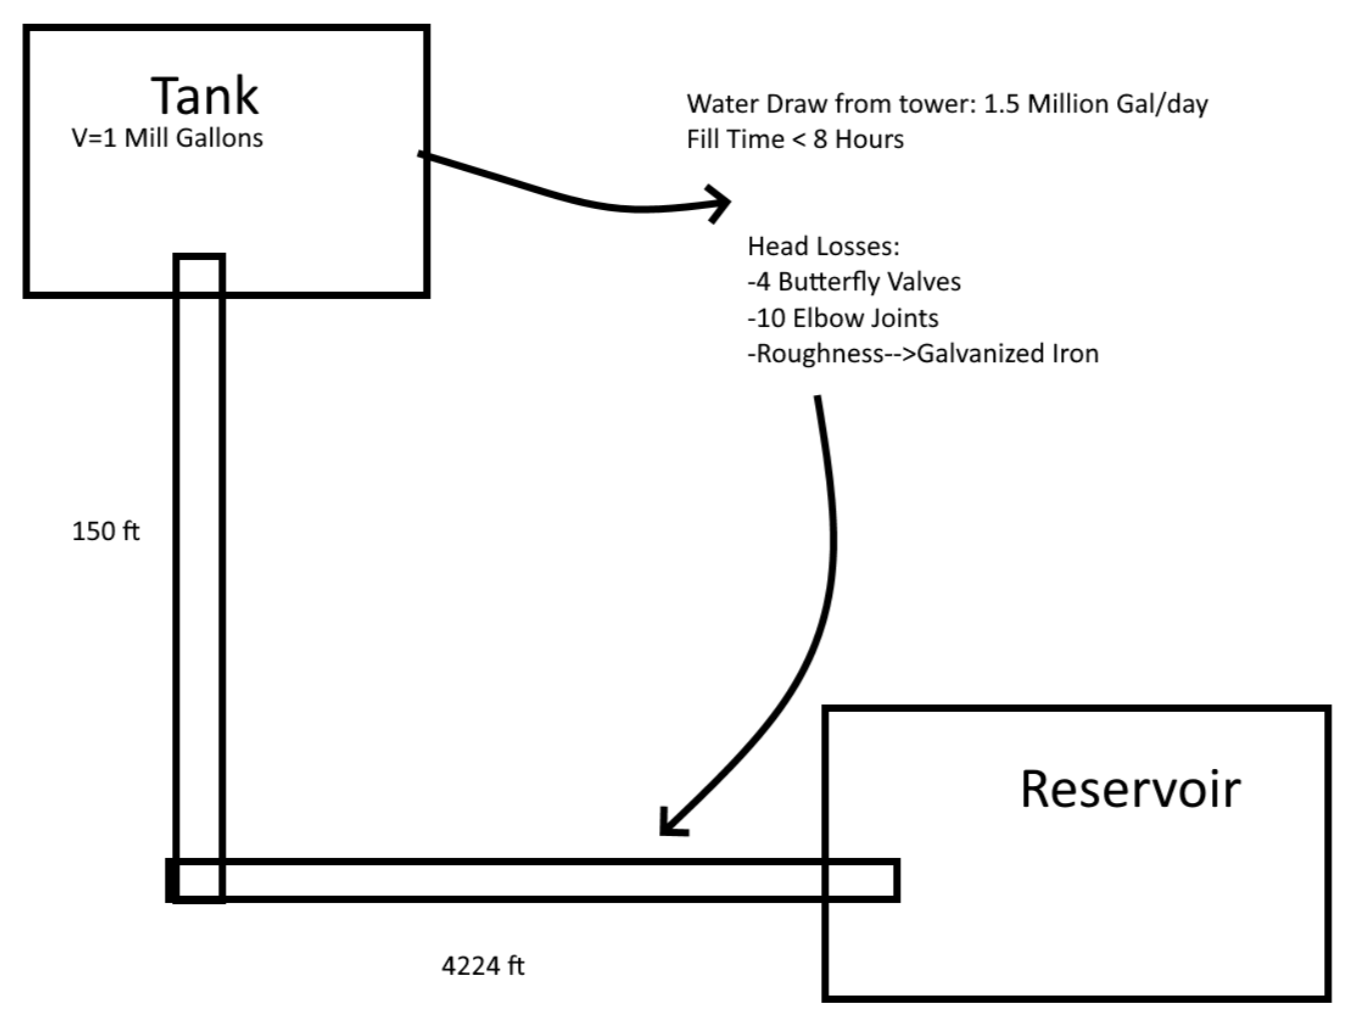

#### 3.6 Head Loss (Pump / Major / Minor)

$$h_{L, minor} = K_L \frac{V^2}{2g}$$
$$h_{L, major} = f\frac{L}{D}\frac{V^2}{2g}$$
$$h_L = h_{L, minor} + h_{L, major}$$ 

In [15]:
%%render short
K_Lelbow = 0.4
K_Lvalve = 0.3
mu = 1.3*u.mm**2/u.s
A_proto = .25 * pi * D_proto**2
V_proto = Q_min / A_proto
Re = rho * D_proto * V_proto / mu
f = 64 / Re
h_LminorELBOW = K_Lelbow * V_proto**2 / 2 / g
h_LminorVALVE = K_Lvalve * V_proto**2 / 2 / g
h_Lmajor = f * d_aquifer / D_proto * V_proto**2 / 2 / g * rho
h_L = 10 * h_LminorELBOW + 4 * h_LminorVALVE + h_Lmajor

<IPython.core.display.Latex object>

In [16]:
print(f'The total head loss is {h_L.to(u.inch)}.')

The total head loss is 0.00190973958145622 inch.


#### 3.7 Final Cost
To calculate the final cost, we used the given variables and plugged in our values. This was over the 8 year life span of our pump.
$$ $$
Pump and Motor - $$ $3500 + $1500(9.787in) = $18,180.50$$
Valves - $$ $300 + $200(9.787in) = $19,064.00$$
Elbows - $$ $50 + $50(9.787in) = $11,665.00$$
Pipes - $$ $1 * 9.787in * 4,374ft = $97,626.72 $$
Electricity Cost - $$ $0.10 * 729836.61 KW * 70,080hr = $5,114,694,962.88 $$
Total Cost - $$ $5,114,841,499.1 $$

$$ $$
Again, the last cost equation was for the total cost over 8 years. To lower the scope of the cost, we also ran the cost equation for a "per month" total. This can be seen below for a 30-day month.
$$ $$
Total Cost per Month to run pump - $$ $0.10 * 729836.61 kW * 720hr = $52,548,235.92$$


### 4 Discussion
We each have learned a lot from this project. Initially, a problem of this scale seems daunting. However, after disecting the problem and applying all of our fluid mechanics knowledge, we were able to create a viable solution to a real world problem. Dimensional analysis is a very powerful tool that can be applied in almost any career we continue with. Working with a team is another skill we developed, learning each others strengths, sharing the workload, and trust in a group are all skills we have developed during this.

An alternative design would be a pump with variable power so it could run harder during peak times, and shut down on off hours. Or, have different sets of pipes to allow more water to flow in these peak times, which could be controlled by values.

This project is not very applicable to the Chicago area. There are two aquifers most of the city relies on. The length and height of the water transportation is different, so our pump would either need to be larger, or have more power to reach requirements. The main difference is the necessary water, as Chicago uses over 1 billion gallons of water per day. We could use a similar approach, accounting for many more elbows, valves, distances, etc., but our new design would need to be scaled much larger. Similar problems lie in Texas. There are 9 major and 22 minor aquifers in Texas, but the width of texas is 773 miles, per our listed reference. Roughly 60% of water used in Texas comes from aquifers, so the piping systems would be much longer to reach the civilizations using these. However, smaller towns that were close to an aquifer could potentially use a system very similar to the one we designed. 

We have already learned that a real world application of our dimensional analysis is very useful, but there are many of factors that affect the ideal economic solution, and further testing with larger models could prove to be more accurate.

#### 4.1 Limitations
Our limitations were the material we used to form our piping system, as well as the distance from the aquifer to the tank. In a real world application, these also could be hard set limitations as well. Past that, our flow rate was a limitation, but we could use many different variations of pipe size, impeller size, and impeller speed to reach our given parameters. Lastly, price is a limitation that will certainly affect the final decision in any project. Balancing the demand from certain components to minimize final cost would be very important.

#### 4.2 Future Work
While thinking about future work within this project, our group had plenty of ideas to progress this project to even higher heights. We could shoot to have our water tank filled in less time, maybe only 6 hours instead of 8 hours. We could also try to be more efficient and cost/power friendly. We liked our results but you can always find ways to save money and add improvements. Our biggest idea was expanding. What if we were to expand to 5 miles and be able to be farther away and pump water a farther distance. Or instead of expanding, possibly having multiple pumps around an area and multiple water tanks so more water could be pumped all over a select area. You can be very creative and apply all your fluid dynamics knowledge to make the best solution to this problem. The future work within this project is truly endless.

### References
$\circ$ Starting to find relationship of impeller size:
https://www.nationalpumpsupply.com/fi-1206-taco-cast-iron-frame-mounted-end-suction-centri[…]X47m5TEFkE59U6kGxLqx06TBBEdObs13h9JbaUcSncaAh5qEALw_wcB

$\circ$ Pump given in problem:
https://www.nationalpumpsupply.com/fi-1206-taco-cast-iron-frame-mounted-end-suction-centrifugal-pump/?gad_source=1&gclid=Cj0KCQiA3uGqBhDdARIsAFeJ5r1pYyTRp1lkmX47m5TEFkE59U6kGxLqx06TBBEdObs13h9JbaUcSncaAh5qEALw_wcB

$\circ$ ChatGPT: What is the power in this problem?

ChatGPT
In fluid mechanics, power (P) is the rate at which work is done or energy is transferred. The power in a pump system can be calculated using the following equation: P=ρQgH

$\circ$ ChatGPT: What is pressure in this problem?

This equation suggests that dimensionless pressure is obtained by dividing the head ($H$) by a combination of fluid density ($\rho$), angular speed ($\Omega$), and pipe diameter ($D$).

$\circ$ Aquifers in texas - https://www.texasalmanac.com/articles/aquifers-oftexas#:~:text=About%2060%20percent%20of%20the,major%20and%2022%20minor%20aquifers.

$\circ$ $K_L$ values for butterfly valve - https://www.plumbingsupply.com/ed-frictionlosses.html